In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## Preparando el DataFrame

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 
               'Skirt', 'Sneaker', 'Bag', 'Ankle boot'] 

In [4]:
train_images.shape

(60000, 28, 28)

## Observando las imagenes

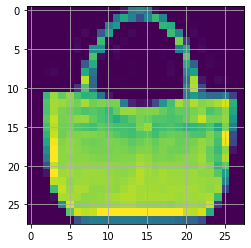

In [5]:
plt.figure()
plt.imshow(train_images[100])
plt.grid(True)

## Dividimos de nuevo nuestro set de imagenes

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
%matplotlib inline

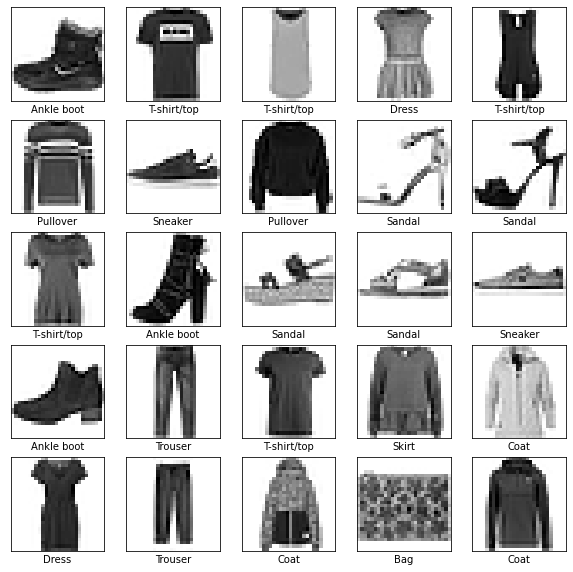

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Entrenamiento

In [9]:
# Crear modelo secuencial:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)), 
                        keras.layers.Dense(128, activation = tf.nn.relu), 
                        keras.layers.Dense(10, activation = tf.nn.softmax)])

In [10]:
# Compilación del modelo:
model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(), 
            loss='sparse_categorical_crossentropy', 
            metrics = ['accuracy'])

In [11]:
# Entrenamiento:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6380 - accuracy: 0.7770
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3857 - accuracy: 0.8596
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3411 - accuracy: 0.8768
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3093 - accuracy: 0.8848
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2957 - accuracy: 0.8908


In [12]:
# Evaluación del modelo:
test_loss, test_acc = model.evaluate( test_images, test_labels )

313/313 [==============================] - 1s 1ms/step - loss: 0.3448 - accuracy: 0.8793


## Prediccion del modelo

In [13]:
# Predicción del modelo:
predictions = model.predict(test_images)

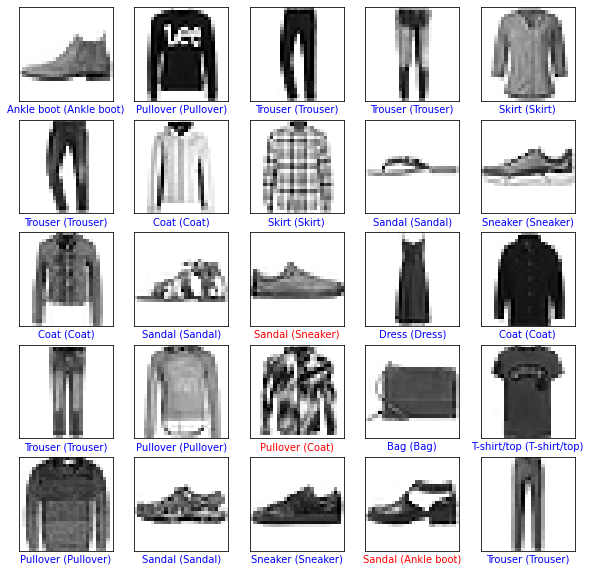

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]

    if predicted_label == true_label:
        color = 'blue'
    else: 
        color = 'red'

    plt.xlabel('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color = color)